In [1234]:
#libraries imported for data preprocessing and analysis 
import pandas as pd
import numpy as np

# Dataset was taken from https://www.kaggle.com/c/titanic and imported using kaggle notebooks.
# training and testing datasets are turned into Pandas DataFrames
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

combine = [train_df, test_df]

#Description of what features are available in both train and test sets. They have the same features but the test set has one feature less which is the predictor.
print(train_df.columns.values)
print(test_df.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


Number of Records in train set and test set given in matrix form.

In [1235]:
# Shape funnction gives the number of rows and columns in a 2 dimensional matrix
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


All the features in the train set shown with their first five rows 

In [1236]:

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


All the features in the test set shown with their first five rows 

In [1237]:

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Printing a list of which attributes have blank values in the train set. Age,Cabin and City embarked from are the attributes with missing values.


In [1238]:
train_df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Using histograms we can visualise the distribution for the data and get an idea of how to fill in the previous missing values.


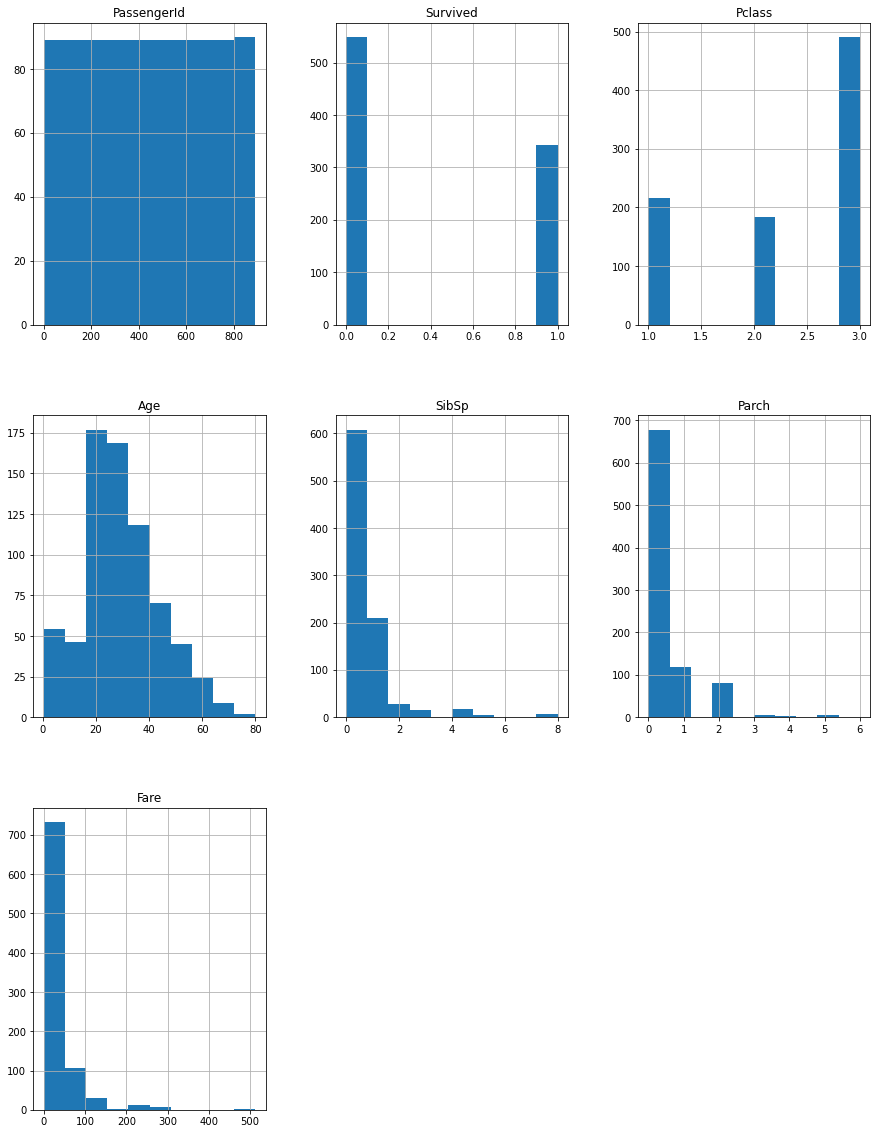

In [1239]:
train_df.hist(bins=10, figsize= (15,20));


Age has a right skewed distribution so we can fill in the missing values by taking in the medium of the column. After filling in the missing values the distribution shows majority of those who did not survive were aged between 20s and 40s. But at the same time we see most who survived were between teens and 30s. Age has a correlation with survival as a result probably because children were evacuated first with women as is common in emergencies.

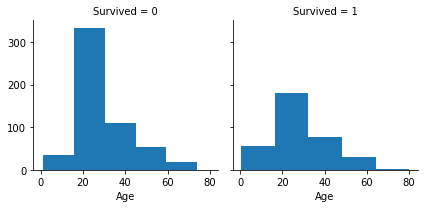

In [1240]:
# visualization
import matplotlib.pyplot as plt
%matplotlib inline

for values in [train_df ,test_df]:
    values['Age'].fillna(values['Age'].median(), inplace = True)


sns.FacetGrid(train_df, col='Survived').map(plt.hist, 'Age', bins=5)

Using factorplots to count the number of survived passengers featurwise as most features are categorical in nature and because it looks more vibrant. There were a higher number of men than women. Almost 40%-50% more men. However more women survived than men. Men who died were more than twice in number than women who survived. Women had a higher chance of survival it seems as in most emergencies women are evacuated first.


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


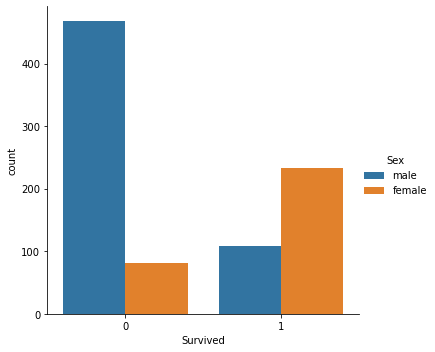

In [1241]:
import seaborn as sns
sns.factorplot('Survived',data=train_df,kind='count',hue='Sex')

According to the factorplot third class passengers were most in number, either twice or more than that of 1st or 2nd. Third class passengers were also the most in number of those who died showing that those in higher classes likely had a higher priority in getting on lifeboats and getting to safety.



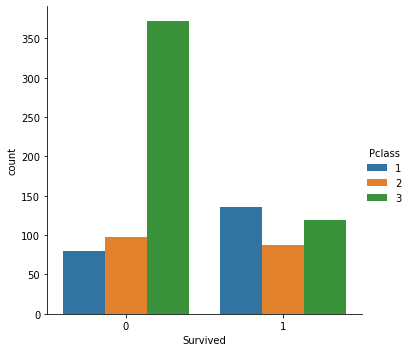

In [1242]:
sns.factorplot('Survived',data=train_df,kind='count',hue='Pclass')

In [1243]:
train_df.drop('Cabin',axis=1,inplace=True)
train_df.drop('Embarked',axis=1,inplace=True)
train_df.drop('Ticket',axis=1,inplace=True)
train_df.drop('Name',axis=1,inplace=True)
train_df.drop('PassengerId',axis=1,inplace=True)
train_df.drop('SibSp',axis=1,inplace=True)
train_df.drop('Parch',axis=1,inplace=True)
train_df.drop('Fare',axis=1,inplace=True)

test_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Embarked',axis=1,inplace=True)
test_df.drop('Ticket',axis=1,inplace=True)
test_df.drop('Name',axis=1,inplace=True)
test_df.drop('SibSp',axis=1,inplace=True)
test_df.drop('Parch',axis=1,inplace=True)
test_df.drop('Fare',axis=1,inplace=True)


Since the problem in question is a classification problem i have chosen 3 classifiers Logistic Regression, RandomForestClassifier and KNeighborsClassifier. To make their predictions as accurate as possible i have further implemented k-Fold Cross Validation. The value of k has been set by trial and error basis.


In [1244]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

# Mapping the values of male and female to 1 and 0 
for values in [train_df,test_df]:
    values['Sex_binary']=values['Sex'].map({'male':1,'female':0})
                                                                
#Setting feature and target variable parameters for the models.    
independant_features = ['Pclass','Age','Sex_binary']
dependant_features = 'Survived'

In [1245]:
#Using k-Fold cross validation on the LogisticRegression model and showing the accuracy using it's RMSE score 
LGR_predictions = cross_val_predict(LogisticRegression(),train_df[independant_features],train_df[dependant_features], cv=5)
LGR_RMSE_accuracy = np.sqrt(metrics.mean_squared_error(train_df[dependant_features], LGR_predictions))
print("Cross Validation RMSE Accuracy for LogisticRegression is ", LGR_RMSE_accuracy)


Cross Validation RMSE Accuracy for LogisticRegression is  0.46178300810757417


In [1246]:
#Using k-Fold cross validation on the RandomForestClassifier model and showing the accuracy using it's RMSE score 
RFR_predictions = cross_val_predict(RandomForestClassifier(),train_df[independant_features],train_df[dependant_features], cv=5)
RFR_RMSE_accuracy = np.sqrt(metrics.mean_squared_error(train_df[dependant_features], RFR_predictions))
print("Cross Validation RMSE Accuracy for DecisionTreeClassifier is ", RFR_RMSE_accuracy)

Cross Validation RMSE Accuracy for DecisionTreeClassifier is  0.4457052822810143


In [1247]:
#Using k-Fold cross validation on the KNeighborsClassifier model and showing the accuracy using it's RMSE score 
KNC_predictions = cross_val_predict(KNeighborsClassifier(n_neighbors = 3),train_df[independant_features],train_df[dependant_features], cv=5)
KNC_RMSE_accuracy = np.sqrt(metrics.mean_squared_error(train_df[dependant_features], KNC_predictions))
print("Cross Validation RMSE Accuracy for KNeighborsClassifier is ", KNC_RMSE_accuracy)

Cross Validation RMSE Accuracy for KNeighborsClassifier is  0.47849370837684896


Decision Tree classifier gave the most most accurate results among all of them so using grid search hyperparameter tuning will be conducted. 

In [1248]:
from sklearn.model_selection import GridSearchCV
#Create classifier object with hyperparameters
#cross validation
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto'],
    'max_depth': [6, 7, 8],
    'criterion': ['entropy']
}

tuned_object = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv = 5)

#Fit our classifier using the training features and the training target values
tuned_object.fit(train_df[independant_features],train_df[dependant_features])
tuned_object.best_estimator_

tuned_object = RandomForestClassifier(criterion = 'entropy', max_depth = 8, n_estimators = 200, random_state = 42)
tuned_object.fit(train_df[independant_features], train_df[dependant_features])

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       random_state=42)

In [1249]:
RFR_predictions = tuned_object.predict(test_df[independant_features])
RFR_predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1255]:
tuned_object_data={}
tuned_object_data["RMSE Score after fine Tuning"] = np.sqrt(metrics.mean_squared_error(train_df[dependant_features],tuned_object.predict(train_df[independant_features])))
tuned_object_data

{'Train_R2_Score': 0.3592609948238129}